# El-Nino La-Nina Forecasting Research

Historically, the El Niño-Southern Oscillation (ENSO) cycle has been a major factor in a commodity trader's toolbox in understanding future productions/yields of agricultural commodities. The significance of the ENSO cycle on commodities can rise to astronomical levels, causing severe droughts or flooding in the Americas and Asia-Pacific regions. 

Weather stations typically release ENSO forecasts that aim to explain general developments of El-Nino/La-Nina. In an ideal setting, these forecasts would be an accurate indicator of the likelihood of an El-Nino/La-Nina, which will be invaluable information to farmers, governments and commodity traders. In this project, we aim to explore the accuracy of historical ENSO forecasts and its performance.

We want to investigate two types of forecast data that is available:
1. International Research Institute for Climate and Society (IRI)'s Sea Surface Temperature (SST) anomalies forecasts
2. IRI probabilistic ENSO forecasts


## 1. Investigating ENSO SST Anomalies Forecast Data

raw ENSO SST forecast data is retrieved here: https://iri.columbia.edu/~forecast/ensofcst/Data/enso_plumes.json


The ENSO predictions plume dataset contains the forecasted SST anomalies from various statistical and dynamical models from a range of third-party international forecasters. They range from weather agencies, government bodies to universities. Forecasted values start from Jan 2004 up until present. The dataset is compiled by the IRI from Columbia Climate School.

These models will provide monthly forecasts for up to **nine** overlapping 3-month periods. The 3-month periods are abbreviated by the starting letter of the month. For example, the 3-month period of Jan-Feb-Mar will be referred to as JFM.

<img src="https://iri.columbia.edu/wp-content/uploads/2022/06/figure4.png" />

For the simplicity of our research, we will convert the interpretation of the 3 month period into corresponding stand-alone months. For instance, in our subsequent visualisations, forecasted values for the 3-month period of Jan-Feb-Mar will be tagged to March (the last month of the 3-month period). This will be further observed later when we discuss the results of our visualisations. This will make it easier for us to plot time values instead of having to deal with 3-month periods on the x-axis.

On the 19th of each month, the IRI will release the updated forecasted values for the given month on its website. 

To investigate the accuracy of the forecasted values, we will aggregate all values and take the average from all models. We will extract and transform the data from enso_plumes.json, after which visualize the trends and accuracy of the forecasts.

### Extract Data

Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime
import seaborn as sn

Read json file

In [2]:
with open('enso_plumes.json', 'r') as myfile:
    data = myfile.read()

plumes_data = json.loads(data)

In [3]:
df = pd.read_json('enso_plumes.json')
df.head()

years
0  {'months': [{'models': [{'data': [0.84, 0.8200...
1  {'months': [{'models': [{'data': [0.85, 0.66, ...
2  {'months': [{'models': [{'data': [-0.71, -0.66...
3  {'months': [{'models': [{'data': [0.58, 0.2, -...
4  {'months': [{'models': [{'data': [-1.82, -1.78...

### Transform Data

unwrap json nested data

In [4]:
# obtains all available years in the dataset and stores it into a pandas series
df = pd.json_normalize(plumes_data['years'])['year']
df

0     2004
1     2005
2     2006
3     2007
4     2008
5     2009
6     2010
7     2011
8     2012
9     2013
10    2014
11    2015
12    2016
13    2017
14    2018
15    2019
16    2020
17    2021
18    2022
Name: year, dtype: int64

In [5]:
def find_last_year(plumes_data):
    '''
    Takes in raw json forecast data, outputs an integer for slicing purposes
    '''
    helper = pd.json_normalize(plumes_data['years'])
    entries_count = pd.json_normalize(helper['months']).count().sum()
    return -(entries_count % 12)

# create a series of years according to data size
year_series = pd.concat([df]*12).sort_values()[:find_last_year(plumes_data)].reset_index().drop(columns='index')
year_series

year
0    2004
1    2004
2    2004
3    2004
4    2004
..    ...
217  2022
218  2022
219  2022
220  2022
221  2022

[222 rows x 1 columns]

In [6]:
df = pd.json_normalize(plumes_data, record_path = ['years', 'months'])
df['Year'] = year_series
df

models  month  \
0    [{'data': [0.84, 0.82, 0.87, 1.03, 1.17, 1.27,...      0   
1    [{'data': [0.5, 0.56, 0.73, 1, 1.19, 1.28, 1.3...      1   
2    [{'data': [0.33, 0.3, 0.28, 0.25, 0.21, 0.19, ...      2   
3    [{'data': [0.85, 1.11, 1.31, 1.35, 1.39, 1.49,...      3   
4    [{'data': [0.33, 0.38, 0.39, 0.4, 0.45, 0.55, ...      4   
..                                                 ...    ...   
217  [{'model': 'NASA GMAO', 'type': 'Dynamical', '...      1   
218  [{'model': 'NASA GMAO', 'type': 'Dynamical', '...      2   
219  [{'model': 'NCEP CFSv2', 'type': 'Dynamical', ...      3   
220  [{'model': 'NASA GMAO', 'type': 'Dynamical', '...      4   
221  [{'model': 'NASA GMAO', 'type': 'Dynamical', '...      5   

                                              observed  Year  
0    [{'data': 0.52, 'month': 'OND'}, {'data': 0.42...  2004  
1    [{'data': 0.39, 'month': 'NDJ'}, {'data': 0.22...  2004  
2    [{'data': 0.27, 'month': 'DJF'}, {'data': 0.16...  2004  
3    [{'data': 0.1, 'month': 'JFM'}, {'data': 0, 'm...  2004  
4    [{'data': 0, 'month': 'FMA'}, {'data': 0.1, 'm...  2004  
..                                                 ...   ...  
217  [{'month': 'NDJ', 'data': -0.94}, {'month': 'J...  2022  
218  [{'month': 'DJF', 'data': -0.8633333333333333}...  2022  
219  [{'month': 'JFM', 'data': -0.81}, {'month': 'M...  2022  
220  [{'month': 'FMA', 'data': -0.85}, {'month': 'A...  2022  
221  [{'month': 'MAM', 'data': -0.9633333333333333}...  2022  

[222 rows x 4 columns]

Calculating the average forecast value from all models

In [7]:
DATA_LENGTH = 9

def find_data_average(dict_lst):
    '''
    input: list of dictionaries with data, or series with dictionaries
    output: list of average forecast data for each 3 month period, length 9
    '''
    final_lst = []
    #filter out None values in dict_lst
    dict_lst = list(filter(None, dict_lst))
    for index in range(DATA_LENGTH):
        value_lst = []
        for dict in dict_lst:

            try:
                # try to catch error if there are Nan values, continue with the loop if there is 
                # if no Nan values, check if data is == -999 (which means data is not available)
                # else, append value to value_lst
                dict['data'][index] == -999
            except:
                continue
            else:
                if dict['data'][index] == -999:
                    continue
                else:
                    value_lst.append(dict['data'][index])

        average = sum(value_lst) / len(value_lst)
        final_lst.append(average)
    
    return final_lst

Create average forecast list for each time period

In [8]:
model_df = pd.json_normalize(df['models'])
avg_forecast_lst = []
for index, row in model_df.iterrows():
    avg_forecast_lst.append(find_data_average(row))
df['Average_Forecast'] = avg_forecast_lst
df

models  month  \
0    [{'data': [0.84, 0.82, 0.87, 1.03, 1.17, 1.27,...      0   
1    [{'data': [0.5, 0.56, 0.73, 1, 1.19, 1.28, 1.3...      1   
2    [{'data': [0.33, 0.3, 0.28, 0.25, 0.21, 0.19, ...      2   
3    [{'data': [0.85, 1.11, 1.31, 1.35, 1.39, 1.49,...      3   
4    [{'data': [0.33, 0.38, 0.39, 0.4, 0.45, 0.55, ...      4   
..                                                 ...    ...   
217  [{'model': 'NASA GMAO', 'type': 'Dynamical', '...      1   
218  [{'model': 'NASA GMAO', 'type': 'Dynamical', '...      2   
219  [{'model': 'NCEP CFSv2', 'type': 'Dynamical', ...      3   
220  [{'model': 'NASA GMAO', 'type': 'Dynamical', '...      4   
221  [{'model': 'NASA GMAO', 'type': 'Dynamical', '...      5   

                                              observed  Year  \
0    [{'data': 0.52, 'month': 'OND'}, {'data': 0.42...  2004   
1    [{'data': 0.39, 'month': 'NDJ'}, {'data': 0.22...  2004   
2    [{'data': 0.27, 'month': 'DJF'}, {'data': 0.16...  2004   
3    [{'data': 0.1, 'month': 'JFM'}, {'data': 0, 'm...  2004   
4    [{'data': 0, 'month': 'FMA'}, {'data': 0.1, 'm...  2004   
..                                                 ...   ...   
217  [{'month': 'NDJ', 'data': -0.94}, {'month': 'J...  2022   
218  [{'month': 'DJF', 'data': -0.8633333333333333}...  2022   
219  [{'month': 'JFM', 'data': -0.81}, {'month': 'M...  2022   
220  [{'month': 'FMA', 'data': -0.85}, {'month': 'A...  2022   
221  [{'month': 'MAM', 'data': -0.9633333333333333}...  2022   

                                      Average_Forecast  
0    [0.37736842105263163, 0.3647368421052632, 0.36...  
1    [0.318421052631579, 0.33894736842105266, 0.377...  
2    [0.22526315789473692, 0.23894736842105263, 0.2...  
3    [0.18736842105263163, 0.26789473684210524, 0.3...  
4    [0.14947368421052634, 0.22684210526315793, 0.2...  
..                                                 ...  
217  [-0.701537666781178, -0.5952292634642763, -0.4...  
218  [-0.7272832916666667, -0.6016736666666666, -0....  
219  [-0.6968667326689882, -0.5918087164555783, -0....  
220  [-0.7512772944680615, -0.6362945096233904, -0....  
221  [-0.6317026030104692, -0.5803548643897951, -0....  

[222 rows x 5 columns]

Further normalizing of json data

In [9]:
observed_df = pd.json_normalize(df['observed'])
observed_df

0  \
0                   {'data': 0.52, 'month': 'OND'}   
1                   {'data': 0.39, 'month': 'NDJ'}   
2                   {'data': 0.27, 'month': 'DJF'}   
3                    {'data': 0.1, 'month': 'JFM'}   
4                      {'data': 0, 'month': 'FMA'}   
..                                             ...   
217                {'month': 'NDJ', 'data': -0.94}   
218  {'month': 'DJF', 'data': -0.8633333333333333}   
219                {'month': 'JFM', 'data': -0.81}   
220                {'month': 'FMA', 'data': -0.85}   
221  {'month': 'MAM', 'data': -0.9633333333333333}   

                                   1  
0     {'data': 0.42, 'month': 'Dec'}  
1     {'data': 0.22, 'month': 'Jan'}  
2     {'data': 0.16, 'month': 'Feb'}  
3        {'data': 0, 'month': 'Mar'}  
4      {'data': 0.1, 'month': 'Apr'}  
..                               ...  
217  {'month': 'Jan', 'data': -0.92}  
218  {'month': 'Feb', 'data': -0.71}  
219  {'month': 'Mar', 'data': -0.89}  
220  {'month': 'Apr', 'data': -0.95}  
221  {'month': 'May', 'data': -1.05}  

[222 rows x 2 columns]

In [10]:
# create dataframe of observed SST anomaly values for 3 month average period
mths3_df = pd.json_normalize(observed_df[0]).rename(columns = {
    'data': 'Observed_3MTH', 'month': '3MTH'
})

# create dataframe of observed SST anomaly values for 1 month period
mths_df = pd.json_normalize(observed_df[1]).rename(columns = {
    'data': 'Observed_Month', 'month': 'Month'
})

# merge both dataframes together
new_observed_df = pd.concat([mths3_df, mths_df], axis = 1)

# merge with original df
df = pd.concat([df, new_observed_df], axis = 1)
df.head()

models  month  \
0  [{'data': [0.84, 0.82, 0.87, 1.03, 1.17, 1.27,...      0   
1  [{'data': [0.5, 0.56, 0.73, 1, 1.19, 1.28, 1.3...      1   
2  [{'data': [0.33, 0.3, 0.28, 0.25, 0.21, 0.19, ...      2   
3  [{'data': [0.85, 1.11, 1.31, 1.35, 1.39, 1.49,...      3   
4  [{'data': [0.33, 0.38, 0.39, 0.4, 0.45, 0.55, ...      4   

                                            observed  Year  \
0  [{'data': 0.52, 'month': 'OND'}, {'data': 0.42...  2004   
1  [{'data': 0.39, 'month': 'NDJ'}, {'data': 0.22...  2004   
2  [{'data': 0.27, 'month': 'DJF'}, {'data': 0.16...  2004   
3  [{'data': 0.1, 'month': 'JFM'}, {'data': 0, 'm...  2004   
4  [{'data': 0, 'month': 'FMA'}, {'data': 0.1, 'm...  2004   

                                    Average_Forecast  Observed_3MTH 3MTH  \
0  [0.37736842105263163, 0.3647368421052632, 0.36...           0.52  OND   
1  [0.318421052631579, 0.33894736842105266, 0.377...           0.39  NDJ   
2  [0.22526315789473692, 0.23894736842105263, 0.2...           0.27  DJF   
3  [0.18736842105263163, 0.26789473684210524, 0.3...           0.10  JFM   
4  [0.14947368421052634, 0.22684210526315793, 0.2...           0.00  FMA   

   Observed_Month Month  
0            0.42   Dec  
1            0.22   Jan  
2            0.16   Feb  
3            0.00   Mar  
4            0.10   Apr

In [11]:
# drop observed column
df = df.drop(columns = 'observed')
df.head()

models  month  Year  \
0  [{'data': [0.84, 0.82, 0.87, 1.03, 1.17, 1.27,...      0  2004   
1  [{'data': [0.5, 0.56, 0.73, 1, 1.19, 1.28, 1.3...      1  2004   
2  [{'data': [0.33, 0.3, 0.28, 0.25, 0.21, 0.19, ...      2  2004   
3  [{'data': [0.85, 1.11, 1.31, 1.35, 1.39, 1.49,...      3  2004   
4  [{'data': [0.33, 0.38, 0.39, 0.4, 0.45, 0.55, ...      4  2004   

                                    Average_Forecast  Observed_3MTH 3MTH  \
0  [0.37736842105263163, 0.3647368421052632, 0.36...           0.52  OND   
1  [0.318421052631579, 0.33894736842105266, 0.377...           0.39  NDJ   
2  [0.22526315789473692, 0.23894736842105263, 0.2...           0.27  DJF   
3  [0.18736842105263163, 0.26789473684210524, 0.3...           0.10  JFM   
4  [0.14947368421052634, 0.22684210526315793, 0.2...           0.00  FMA   

   Observed_Month Month  
0            0.42   Dec  
1            0.22   Jan  
2            0.16   Feb  
3            0.00   Mar  
4            0.10   Apr

In [12]:
# add 1 to month value to more intuitive understanding (1 -> Jan, 2 -> Feb etc.)
df['month'] = df['month'] + 1

# create datetime column
df['Date'] = pd.to_datetime(df[['Year', 'month']].assign(DAY=1))
df.head()

models  month  Year  \
0  [{'data': [0.84, 0.82, 0.87, 1.03, 1.17, 1.27,...      1  2004   
1  [{'data': [0.5, 0.56, 0.73, 1, 1.19, 1.28, 1.3...      2  2004   
2  [{'data': [0.33, 0.3, 0.28, 0.25, 0.21, 0.19, ...      3  2004   
3  [{'data': [0.85, 1.11, 1.31, 1.35, 1.39, 1.49,...      4  2004   
4  [{'data': [0.33, 0.38, 0.39, 0.4, 0.45, 0.55, ...      5  2004   

                                    Average_Forecast  Observed_3MTH 3MTH  \
0  [0.37736842105263163, 0.3647368421052632, 0.36...           0.52  OND   
1  [0.318421052631579, 0.33894736842105266, 0.377...           0.39  NDJ   
2  [0.22526315789473692, 0.23894736842105263, 0.2...           0.27  DJF   
3  [0.18736842105263163, 0.26789473684210524, 0.3...           0.10  JFM   
4  [0.14947368421052634, 0.22684210526315793, 0.2...           0.00  FMA   

   Observed_Month Month       Date  
0            0.42   Dec 2004-01-01  
1            0.22   Jan 2004-02-01  
2            0.16   Feb 2004-03-01  
3            0.00   Mar 2004-04-01  
4            0.10   Apr 2004-05-01

#### Manipulation of df for visualisation purposes

In [13]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [14]:
def get_forecast_mth(date):
    '''
    Takes in the date of data release, returns the equivalent 3 month rolling month
    Example: Jan 2022 -> Mar 2022 (JFM)
    '''
    delta = relativedelta(months = 2)
    return date + delta

def get_observed_mth(date):
    '''
    Takes in the date of data release, returns the date of latest observed data released
    Observed data is always released with a 1 month lag
    '''
    delta = relativedelta(months = 1)
    return date - delta



def create_date_df(date, forecast_list):
    '''
    create a df of dates corresponding to a set of SST anomaly forecasts
    '''
    lst = [date.replace(day=1)]
    for i in range(len(forecast_list) - 1):
        lst.append((lst[-1] + relativedelta(months = 1)).replace(day=1))
    return pd.DataFrame(lst)
    

def create_forecast_df(forecast_list, date):
    '''
    create a dataframe of forecasts and dates at each specific time period

    '''
    data_df = pd.DataFrame(forecast_list)
    data_df.columns = ['Forecast']

    first_date = get_forecast_mth(date)
    date_df = create_date_df(first_date, forecast_list)
    date_df.columns = ['Date']
    forecast_df = pd.concat([data_df, date_df], axis = 1)
    forecast_df.set_index('Date', inplace = True)

    return forecast_df


In [15]:
#from df, create a dictionary that stores all the different forecast values according to the starting month
#key = date, values = dataframe of forecasted values with forecasted month

forecast_dict = {date:create_forecast_df(forecast, date) for forecast, date in zip(df['Average_Forecast'], df['Date'])}
forecast_dict[datetime(2004,1,1)]

Forecast
Date                
2004-03-01  0.377368
2004-04-01  0.364737
2004-05-01  0.365000
2004-06-01  0.388824
2004-07-01  0.412941
2004-08-01  0.389375
2004-09-01  0.402667
2004-10-01  0.350000
2004-11-01  0.331667

In [16]:
observed_df = df[['Date', 'Observed_3MTH']]
observed_df['Date'] = observed_df['Date'].apply(lambda x: get_observed_mth(x))
observed_df.set_index('Date', inplace = True)
observed_df

C:\Users\raych\AppData\Local\Temp\ipykernel_20036\3176640886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observed_df['Date'] = observed_df['Date'].apply(lambda x: get_observed_mth(x))


Observed_3MTH
Date                     
2003-12-01       0.520000
2004-01-01       0.390000
2004-02-01       0.270000
2004-03-01       0.100000
2004-04-01       0.000000
...                   ...
2022-01-01      -0.940000
2022-02-01      -0.863333
2022-03-01      -0.810000
2022-04-01      -0.850000
2022-05-01      -0.963333

[222 rows x 1 columns]

In [17]:
# double check for any null values
observed_df.isnull().any()

Observed_3MTH    False
dtype: bool

### Visualisation of ENSO forecasts

Using Matplotlib

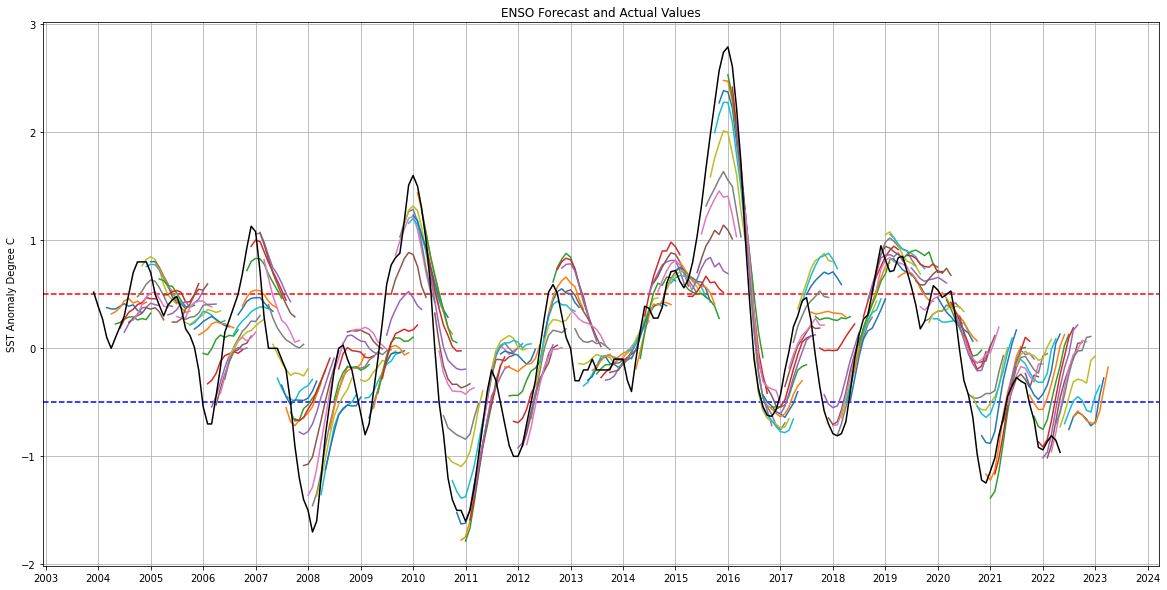

In [18]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
#Matplotlib Plotting
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1,1,1) 
plt.grid()
plt.title('ENSO Forecast and Actual Values')
plt.axhline(y = 0.5, color = 'r', linestyle = 'dashed')
plt.axhline(y = -0.5, color = 'b', linestyle = 'dashed')
plt.ylabel('SST Anomaly Degree C')


for key, df in forecast_dict.items():
    plt.plot(df.index, df['Forecast'])

plt.plot(observed_df.index, observed_df['Observed_3MTH'], 'k')
ax.xaxis.set_major_locator(mdates.YearLocator(1))
plt.show()


Using Plotly
- plotly has more functionality for interactive visualisation

In [19]:
import plotly
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

pyo.init_notebook_mode(connected=True)

#print(data_return.info())
pd.options.plotting.backend = 'plotly'

In [20]:
# Creating custom color list to label different months (each month will have a distinct color)

color_discrete_sequence=px.colors.qualitative.Plotly + ["#bcbd22", "#316395"]
custom_color = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0", "#a52a2a", "#483d8b", "#8b0000"]
print(color_discrete_sequence)

['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#bcbd22', '#316395']


In [21]:
def get_color(seq,i):
    '''
    function for plotly color assigning
    seq = dictionary, i = int
    '''
    return seq[i%len(seq)]


# Using plotly graph objects
fig = go.Figure(layout=go.Layout(height = 750, width = 1500))
i = 0

# iterate over forecast_dict to plot forecast lines
for key, df in forecast_dict.items():
    fig.add_trace(go.Scatter(x = df.index, y = df['Forecast'], name = key.strftime('%Y-%m-%d'), marker = {'color': get_color(color_discrete_sequence, i)}))
    i += 1

# add observed sst line
fig.add_trace(go.Scatter(x = observed_df.index,  y = observed_df['Observed_3MTH'], mode = 'lines+markers', name = 'Observed',  line = dict(color = 'black')))

# add elnino sst threshold
fig.add_hline(y=0.5, line_color = 'red', line_dash = 'dash')

# add lanina sst threshold
fig.add_hline(y = -0.5, line_color = 'blue', line_dash = 'dash')


fig.update_yaxes(title_text="SST Anomalies (℃)")
fig.update_xaxes(dtick="M12", tickformat="%Y", hoverformat = "%B %Y")
fig.update_layout(title = 'ENSO Forecast and Observed Values')

fig.show()


### ENSO forecasts grouped by forecast horizon

Next, we wanted to visualise the ENSO forecasts values grouped by forecast horizon.

 Forecasts will be grouped according to their forecast horizon (T+1, T+2, T+3 ...)
- From this, we want to observe the characteristics and accuracy of the forecasts depending on how near their intended forecast is to the current date.


In [22]:
# Forecast range limit is 9, which means T+9 will be the furthest forecast horizon provided by the forecasting models
FORECAST_RANGE = 9

master_df = pd.DataFrame()

# loop over FORECAST_RANGE
for i in range(FORECAST_RANGE):
    t_df = pd.DataFrame()

    # loop over all forecasts in forecast_dict
    for key, df in forecast_dict.items():

        # retrive only the ith forecast horizon
        t_df = pd.concat([t_df, df.iloc[i]], axis = 1, join = 'outer')

    #transpose in order to get forecast horizon as a column
    t_df = t_df.transpose()

    #rename the forecast horizon to the corresponding period
    t_df.rename(columns = {'Forecast': 'T+'+str(i+1)}, inplace = True)
    master_df = pd.concat([master_df, t_df], axis = 1, join = 'outer')

master_df

T+1       T+2       T+3       T+4       T+5       T+6  \
2004-03-01  0.377368       NaN       NaN       NaN       NaN       NaN   
2004-04-01  0.318421  0.364737       NaN       NaN       NaN       NaN   
2004-05-01  0.225263  0.338947  0.365000       NaN       NaN       NaN   
2004-06-01  0.187368  0.238947  0.377222  0.388824       NaN       NaN   
2004-07-01  0.149474  0.267895  0.268889  0.439412  0.412941       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-12-01       NaN       NaN       NaN       NaN -0.691075 -0.717113   
2023-01-01       NaN       NaN       NaN       NaN       NaN -0.697723   
2023-02-01       NaN       NaN       NaN       NaN       NaN       NaN   
2023-03-01       NaN       NaN       NaN       NaN       NaN       NaN   
2023-04-01       NaN       NaN       NaN       NaN       NaN       NaN   

                 T+7       T+8       T+9  
2004-03-01       NaN       NaN       NaN  
2004-04-01       NaN       NaN       NaN  
2004-05-01       NaN       NaN       NaN  
2004-06-01       NaN       NaN       NaN  
2004-07-01       NaN       NaN       NaN  
...              ...       ...       ...  
2022-12-01 -0.590189 -0.113169  0.109567  
2023-01-01 -0.681231 -0.435382 -0.070961  
2023-02-01 -0.581102 -0.438628 -0.343234  
2023-03-01       NaN -0.377385 -0.274230  
2023-04-01       NaN       NaN -0.173767  

[230 rows x 9 columns]

In [23]:
observed_df

Observed_3MTH
Date                     
2003-12-01       0.520000
2004-01-01       0.390000
2004-02-01       0.270000
2004-03-01       0.100000
2004-04-01       0.000000
...                   ...
2022-01-01      -0.940000
2022-02-01      -0.863333
2022-03-01      -0.810000
2022-04-01      -0.850000
2022-05-01      -0.963333

[222 rows x 1 columns]

In [24]:
# add observed values into master_df
master_df = pd.concat([master_df,observed_df], axis = 1, join = 'outer')
master_df.index.name = 'Date'


In [25]:
master_df

T+1       T+2  T+3  T+4       T+5       T+6       T+7  \
Date                                                                     
2003-12-01       NaN       NaN  NaN  NaN       NaN       NaN       NaN   
2004-01-01       NaN       NaN  NaN  NaN       NaN       NaN       NaN   
2004-02-01       NaN       NaN  NaN  NaN       NaN       NaN       NaN   
2004-03-01  0.377368       NaN  NaN  NaN       NaN       NaN       NaN   
2004-04-01  0.318421  0.364737  NaN  NaN       NaN       NaN       NaN   
...              ...       ...  ...  ...       ...       ...       ...   
2022-12-01       NaN       NaN  NaN  NaN -0.691075 -0.717113 -0.590189   
2023-01-01       NaN       NaN  NaN  NaN       NaN -0.697723 -0.681231   
2023-02-01       NaN       NaN  NaN  NaN       NaN       NaN -0.581102   
2023-03-01       NaN       NaN  NaN  NaN       NaN       NaN       NaN   
2023-04-01       NaN       NaN  NaN  NaN       NaN       NaN       NaN   

                 T+8       T+9  Observed_3MTH  
Date                                           
2003-12-01       NaN       NaN           0.52  
2004-01-01       NaN       NaN           0.39  
2004-02-01       NaN       NaN           0.27  
2004-03-01       NaN       NaN           0.10  
2004-04-01       NaN       NaN           0.00  
...              ...       ...            ...  
2022-12-01 -0.113169  0.109567            NaN  
2023-01-01 -0.435382 -0.070961            NaN  
2023-02-01 -0.438628 -0.343234            NaN  
2023-03-01 -0.377385 -0.274230            NaN  
2023-04-01       NaN -0.173767            NaN  

[233 rows x 10 columns]

Correlation Matrix

In [26]:
master_df.corr()

T+1       T+2       T+3       T+4       T+5       T+6  \
T+1            1.000000  0.986440  0.956061  0.912314  0.853098  0.777716   
T+2            0.986440  1.000000  0.984113  0.948502  0.895434  0.819630   
T+3            0.956061  0.984113  1.000000  0.981264  0.938921  0.871505   
T+4            0.912314  0.948502  0.981264  1.000000  0.976549  0.922497   
T+5            0.853098  0.895434  0.938921  0.976549  1.000000  0.968081   
T+6            0.777716  0.819630  0.871505  0.922497  0.968081  1.000000   
T+7            0.702151  0.743212  0.794044  0.852554  0.909727  0.964124   
T+8            0.608637  0.641022  0.693413  0.751193  0.818709  0.890103   
T+9            0.521723  0.547180  0.591455  0.653525  0.719646  0.804195   
Observed_3MTH  0.962568  0.931677  0.893632  0.847277  0.793296  0.725356   

                    T+7       T+8       T+9  Observed_3MTH  
T+1            0.702151  0.608637  0.521723       0.962568  
T+2            0.743212  0.641022  0.547180       0.931677  
T+3            0.794044  0.693413  0.591455       0.893632  
T+4            0.852554  0.751193  0.653525       0.847277  
T+5            0.909727  0.818709  0.719646       0.793296  
T+6            0.964124  0.890103  0.804195       0.725356  
T+7            1.000000  0.948082  0.872898       0.663910  
T+8            0.948082  1.000000  0.944885       0.578199  
T+9            0.872898  0.944885  1.000000       0.488574  
Observed_3MTH  0.663910  0.578199  0.488574       1.000000

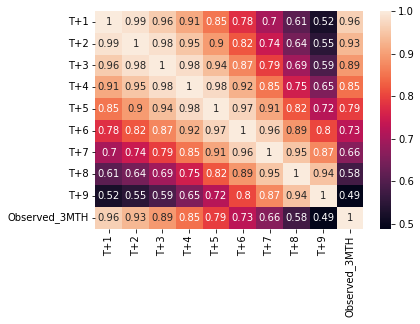

In [27]:
sn.heatmap(master_df.corr(), annot=True)
plt.show()

Looking at the correlation matrix, forecasted values with near horizon have very high correlations when compared to the observed values, which is intuitive as strength of forecasted values would be stronger for short term horizons. The strength of the forecasts decreases as it attempts to predict values further into the future.

#### Visualizing ENSO forecast horizon data

In [28]:
# Using plotly graph objects
fig1_2 = go.Figure(layout=go.Layout(height = 750, width = 1500))
i = 0
for col in master_df.columns[:-1]:
    fig1_2.add_trace(go.Line(x = master_df.index, y = master_df[col], name = col, marker = {'color': get_color(color_discrete_sequence, i)}))
    i += 1

fig1_2.add_trace(go.Line(x = observed_df.index,  y = observed_df['Observed_3MTH'], mode = 'lines+markers', name = 'Observed',  line = dict(color = 'black')))


fig1_2.add_hline(y=0.5, line_color = 'red', line_dash = 'dash')
fig1_2.add_hline(y = -0.5, line_color = 'blue', line_dash = 'dash')
fig1_2.update_yaxes(title_text="SST Anomalies (℃)")
fig1_2.update_xaxes(dtick="M12", tickformat="%Y", hoverformat = "%B %Y")
fig1_2.update_layout(title = 'ENSO Forecasts grouped by forecast horizon')

fig1_2.show()


c:\Users\raych\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




The T+1 forecast horizon tracks the observed values the best. As the forecast horizon increases, the predictions start to become less precise.

#### Visualising forecast errors

We will define the calculation of errors as: observed values - predicted values

- if error is a negative value, that means the forecast __overpredicted__ the actual outcome
- if error is a positive value, that means the forecast __underpredicted__ the actual outcome

In [29]:
#errors = observed - predicted

errors_df = pd.DataFrame()

for col in master_df.columns[:-1]:
    errors_df[col] = master_df['Observed_3MTH'].apply(lambda x: np.abs(x)) - master_df[col].apply(lambda x: np.abs(x))

errors_df['Observed_3MTH'] = master_df['Observed_3MTH']

In [30]:
errors_df

T+1       T+2  T+3  T+4  T+5  T+6  T+7  T+8  T+9  \
Date                                                                
2003-12-01       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2004-01-01       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2004-02-01       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2004-03-01 -0.277368       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2004-04-01 -0.318421 -0.364737  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...              ...       ...  ...  ...  ...  ...  ...  ...  ...   
2022-12-01       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2023-01-01       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2023-02-01       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2023-03-01       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2023-04-01       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

            Observed_3MTH  
Date                       
2003-12-01           0.52  
2004-01-01           0.39  
2004-02-01           0.27  
2004-03-01           0.10  
2004-04-01           0.00  
...                   ...  
2022-12-01            NaN  
2023-01-01            NaN  
2023-02-01            NaN  
2023-03-01            NaN  
2023-04-01            NaN  

[233 rows x 10 columns]

Finding the absolute mean error for each forecast horizon

In [31]:
errors_df.apply(lambda x: np.abs(x)).mean()

T+1              0.169763
T+2              0.224518
T+3              0.270483
T+4              0.315303
T+5              0.358647
T+6              0.394159
T+7              0.420820
T+8              0.440998
T+9              0.452018
Observed_3MTH    0.636802
dtype: float64

Forecast horizon T+1 has the lowest absolute mean error of 0.16℃.

In [32]:
# Using plotly graph objects
fig1_3 = go.Figure(layout=go.Layout(height = 750, width = 1500))
i = 0
for col in errors_df.columns[:-1]:
    fig1_3.add_trace(go.Scatter(x = errors_df.index, y = errors_df[col], name = col, marker = {'color': get_color(color_discrete_sequence, i)}))
    i += 1

fig1_3.add_trace(go.Scatter(x = observed_df.index,  y = observed_df['Observed_3MTH'], mode = 'lines+markers', name = 'Observed',  line = dict(color = 'black')))


fig1_3.add_hline(y=0.5, line_color = 'red', line_dash = 'dash')
fig1_3.add_hline(y = -0.5, line_color = 'blue', line_dash = 'dash')
fig1_3.update_yaxes(title_text="SST Anomalies (℃)")
fig1_3.update_xaxes(dtick="M12", tickformat="%Y", hoverformat = "%B %Y")
fig1_3.update_layout(title = 'ENSO Forecasts Errors')

fig1_3.show()


## 2. Investigating IRI probabilistic forecasts

raw IRI probabilistic forecast data is retrieved here: https://iri.columbia.edu/~forecast/ensofcst/Data/enso_iri_prob.json

The IRI probabilistic ENSO forecast shows the likelihood of an El-Nino, La-Nina or a neutral state in terms of probability. These probability forecasts are calculated based on regression, with the inputs being the SST anomalies forecasts from the various models. The probabilities across the three states will sum up to 1. 

Similar to the SST forecasts, the IRI probabilistic forecast provides monthly forecasts for up to nine 3-month overlapping periods. Probabilistic forecasts data starts from June 2003 up til present.

<img src="https://iri.columbia.edu/wp-content/uploads/2022/06/figure3.png" />

On the 19th of each month, the IRI will release the updated forecasted values for the given month on its website. 



### Extract Data

In [33]:
with open('enso_iri_prob.json', 'r') as myfile:
    data = myfile.read()

enso_iri_data = json.loads(data)

### Transform Data

In [34]:
# IRI probabilities started from June 2003, which means there are only 7 2003 monthly probabiltiies released

df = pd.json_normalize(enso_iri_data['years'])['year']

def find_last_year_iri(enso_iri_data):
    helper = pd.json_normalize(enso_iri_data['years'])

    # the addition of 5 is to make up for the fact that there are only 7 2003 monthly probabilities released (12 - 7 = 5)
    entries_count = pd.json_normalize(helper['months']).count().sum() + 5
    return -(entries_count % 12)

# crate year series
year_series = pd.concat([df]*12).sort_values()[5:find_last_year_iri(enso_iri_data)].reset_index().drop(columns='index')
year_series

year
0    2003
1    2003
2    2003
3    2003
4    2003
..    ...
224  2022
225  2022
226  2022
227  2022
228  2022

[229 rows x 1 columns]

In [35]:
df = pd.json_normalize(enso_iri_data, record_path = ['years', 'months'])
df['Year'] = year_series
df

month                                      probabilities  Year
0        5  [{'elnino': 0, 'lanina': 45, 'neutral': 55, 's...  2003
1        6  [{'elnino': 18, 'lanina': 30, 'neutral': 52, '...  2003
2        7  [{'elnino': 12, 'lanina': 12, 'neutral': 76, '...  2003
3        8  [{'elnino': 10, 'lanina': 10, 'neutral': 80, '...  2003
4        9  [{'elnino': 15, 'lanina': 5, 'neutral': 80, 's...  2003
..     ...                                                ...   ...
224      1  [{'season': 'FMA', 'lanina': 79, 'neutral': 21...  2022
225      2  [{'season': 'MAM', 'lanina': 86, 'neutral': 14...  2022
226      3  [{'season': 'AMJ', 'lanina': 80, 'neutral': 20...  2022
227      4  [{'season': 'MJJ', 'lanina': 81, 'neutral': 19...  2022
228      5  [{'season': 'JJA', 'lanina': 66, 'neutral': 34...  2022

[229 rows x 3 columns]

In [36]:
df['month'] = df['month'] + 1

# create datetime column, forecasts are released on the 19th of each month
df['Date'] = pd.to_datetime(df[['Year', 'month']].assign(DAY=19))
df.head()

month                                      probabilities  Year       Date
0      6  [{'elnino': 0, 'lanina': 45, 'neutral': 55, 's...  2003 2003-06-19
1      7  [{'elnino': 18, 'lanina': 30, 'neutral': 52, '...  2003 2003-07-19
2      8  [{'elnino': 12, 'lanina': 12, 'neutral': 76, '...  2003 2003-08-19
3      9  [{'elnino': 10, 'lanina': 10, 'neutral': 80, '...  2003 2003-09-19
4     10  [{'elnino': 15, 'lanina': 5, 'neutral': 80, 's...  2003 2003-10-19

In [37]:
df.probabilities[0]

[{'elnino': 0, 'lanina': 45, 'neutral': 55, 'season': 'JJA'},
 {'elnino': 1, 'lanina': 45, 'neutral': 54, 'season': 'JAS'},
 {'elnino': 1, 'lanina': 45, 'neutral': 54, 'season': 'ASO'},
 {'elnino': 1, 'lanina': 45, 'neutral': 54, 'season': 'SON'},
 {'elnino': 1, 'lanina': 45, 'neutral': 54, 'season': 'OND'},
 {'elnino': 2, 'lanina': 44, 'neutral': 54, 'season': 'NDJ'},
 {'elnino': 5, 'lanina': 42, 'neutral': 53, 'season': 'DJF'},
 {'elnino': 9, 'lanina': 40, 'neutral': 51, 'season': 'JFM'},
 {'elnino': 13, 'lanina': 37, 'neutral': 50, 'season': 'FMA'},
 {'elnino': 18, 'lanina': 32, 'neutral': 50, 'season': 'MAM'}]

In [38]:
def aggregate_prob(list_of_dict):
    '''
    function to transform the above list of dictionaries into a dictionary, with the key being the event, and value being the list of 
    forecasted values
    '''
    final_dict = {}
    final_dict['elnino'] = []
    final_dict['lanina'] = []
    final_dict['neutral'] = []
    final_dict['season'] = []
    for i in list_of_dict:
        for key,value in i.items():
            final_dict[key].append(value)
    return final_dict

In [39]:
df['probabilities'] = df['probabilities'].apply(lambda x: aggregate_prob(x))
df.head()

month                                      probabilities  Year       Date
0      6  {'elnino': [0, 1, 1, 1, 1, 2, 5, 9, 13, 18], '...  2003 2003-06-19
1      7  {'elnino': [18, 18, 18, 18, 18, 18, 19, 20, 22...  2003 2003-07-19
2      8  {'elnino': [12, 13, 14, 15, 17, 19, 21, 23, 25...  2003 2003-08-19
3      9  {'elnino': [10, 11, 12, 13, 15, 17, 19, 22, 24...  2003 2003-09-19
4     10  {'elnino': [15, 16, 17, 18, 20, 22, 24, 25, 25...  2003 2003-10-19

#### Manipulation of df for visualisation purposes

In [40]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [41]:
# Example of how one entry will appear in df.probabilities
pd.DataFrame(df.probabilities[0])

elnino  lanina  neutral season
0       0      45       55    JJA
1       1      45       54    JAS
2       1      45       54    ASO
3       1      45       54    SON
4       1      45       54    OND
5       2      44       54    NDJ
6       5      42       53    DJF
7       9      40       51    JFM
8      13      37       50    FMA
9      18      32       50    MAM

In [42]:
def create_probs_df(forecast_dict, date):
    '''
    Creates a dataframe of the probabilistic forecasts and the corresponding dates
    '''

    def get_forecast_mth(date):
        '''
        Takes in the date of data release, returns the equivalent 3 month rolling month
        Example: Jan 2022 -> Mar 2022 (JFM)
        '''
        delta = relativedelta(months = 2)
        return date + delta

    def create_probs_date_df(date, forecast_dict):
        '''
        Creates a date df for IRI probabilistic forecasts
        '''
        lst = [date.replace(day=1)]

        # iterate over the length of the forecast values
        for i in range(len(next(iter(forecast_dict.values()))) - 1):
            lst.append((lst[-1] + relativedelta(months = 1)).replace(day = 1))
        return pd.DataFrame(lst)
    

    data_df = pd.DataFrame(forecast_dict)
    first_date = get_forecast_mth(date)
    date_df = create_probs_date_df(first_date, forecast_dict)
    date_df.columns = ['Date']
    forecast_df = pd.concat([data_df, date_df], axis = 1)
    forecast_df.set_index('Date', inplace = True)

    return forecast_df

In [43]:
#from df, create a dictionary that stores all the different forecast values according to the starting month
#key = date, values = dataframe of forecasted values with forecasted month

probs_dict = {date:create_probs_df(prob, date) for prob, date in zip(df['probabilities'], df['Date'])}
probs_dict[datetime(2003,6,19)]

elnino  lanina  neutral season
Date                                      
2003-08-01       0      45       55    JJA
2003-09-01       1      45       54    JAS
2003-10-01       1      45       54    ASO
2003-11-01       1      45       54    SON
2003-12-01       1      45       54    OND
2004-01-01       2      44       54    NDJ
2004-02-01       5      42       53    DJF
2004-03-01       9      40       51    JFM
2004-04-01      13      37       50    FMA
2004-05-01      18      32       50    MAM

### Visualisation of Probabilistic Forecasts

In [44]:
import plotly
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

pyo.init_notebook_mode(connected=True)

#print(data_return.info())
pd.options.plotting.backend = 'plotly'

#### Visualising El-Nino Probabilities against observed SST anomaly values

In [45]:
fig1 = make_subplots(specs=[[{"secondary_y": True}]])

for key, df in probs_dict.items():
    fig1.add_trace(go.Scatter(x = df.index, y = df['elnino'], mode = 'lines', name = key.strftime('%Y-%m-%d'), marker = {'color': 'red'}), secondary_y=False)

    
fig1.add_trace(go.Scatter(x = observed_df.index,  y = observed_df['Observed_3MTH'], mode = 'lines+markers', name = 'Observed',  line = dict(color = 'black')), secondary_y=True)

fig1.add_hline(y=0.5, line_color = 'red', line_dash = 'dash', secondary_y=True)
fig1.add_hline(y = -0.5, line_color = 'blue', line_dash = 'dash', secondary_y=True)

fig1.update_xaxes(dtick="M12", tickformat="%Y", hoverformat = "%B %Y")
fig1.update_yaxes(title_text="El Nino Probability (%)", secondary_y=False)
fig1.update_yaxes(title_text="Observed SST Anomalies (℃)", secondary_y=True)
fig1.update_layout(height = 750, width = 1500, title = 'El-Nino Probabilities')
fig1.show()

#### Visualising La-Nina Probabilities against observed SST anomaly values

In [46]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])


for key, df in probs_dict.items():
    fig2.add_trace(go.Scatter(x = df.index, y = df['lanina'], mode = 'lines', name = key.strftime('%Y-%m-%d'), marker = {'color': 'blue'}), secondary_y=False)
    
fig2.add_trace(go.Scatter(x = observed_df.index,  y = observed_df['Observed_3MTH'], mode = 'lines+markers', name = 'Observed',  line = dict(color = 'black')), secondary_y=True)

fig2.add_hline(y=0.5, line_color = 'red', line_dash = 'dash', secondary_y=True)
fig2.add_hline(y = -0.5, line_color = 'blue', line_dash = 'dash', secondary_y=True)

    
fig2.update_xaxes(dtick="M12", tickformat="%Y", hoverformat = "%B %Y")
fig2.update_yaxes(title_text="La Nina Probability (%)", secondary_y=False)
fig2.update_yaxes(title_text="Observed SST Anomalies (℃)", secondary_y=True)
fig2.update_layout(height = 750, width = 1500, title = 'La-Nina Probabilities')
fig2.show()

#### Visualizing ENSO forecast grouped by forecast horizon

Transposing Data, to plot graphs according to T+1, T+2 etc.

Transposing El-Nino Data

In [47]:
FORECAST_RANGE = 9
t_1_list = []
elnino_df = pd.DataFrame()

for i in range(FORECAST_RANGE):
    t_1_df = pd.DataFrame()

    for key, df in probs_dict.items():
        t_1_df = pd.concat([t_1_df, pd.DataFrame(df['elnino']).iloc[i]], axis = 1, join = 'outer')

    t_1_df = t_1_df.transpose()
    t_1_df.rename(columns = {'elnino': 'T+'+str(i+1)}, inplace = True)
    elnino_df = pd.concat([elnino_df, t_1_df], axis = 1, join = 'outer')

Transposing La-Nina Data

In [48]:
FORECAST_RANGE = 9
t_1_list = []
lanina_df = pd.DataFrame()

for i in range(FORECAST_RANGE):
    t_1_df = pd.DataFrame()

    for key, df in probs_dict.items():
        #print(df.iloc[i])
        #print(len(df['elnino']))
        t_1_df = pd.concat([t_1_df, pd.DataFrame(df['lanina']).iloc[i]], axis = 1, join = 'outer')

    t_1_df = t_1_df.transpose()
    t_1_df.rename(columns = {'lanina': 'T+'+str(i+1)}, inplace = True)
    lanina_df = pd.concat([lanina_df, t_1_df], axis = 1, join = 'outer')

#### Visualising El-Nino Probabilistic forecasts grouped by forecast horizon

In [49]:
fig3 = make_subplots(specs=[[{"secondary_y": True}]])


for col in elnino_df.columns:
    fig3.add_trace(go.Scatter(x = elnino_df.index, y = elnino_df[col], mode = 'lines+markers', name = col), secondary_y=False)

fig3.add_trace(go.Scatter(x = observed_df.index,  y = observed_df['Observed_3MTH'], mode = 'lines+markers', name = 'Observed',  line = dict(color = 'black')), secondary_y=True)

fig3.add_hline(y=0.5, line_color = 'red', line_dash = 'dash', secondary_y=True)
fig3.add_hline(y = -0.5, line_color = 'blue', line_dash = 'dash', secondary_y=True)

    
fig3.update_xaxes(dtick="M12", tickformat="%Y", hoverformat = "%B %Y")
fig3.update_yaxes(title_text="El Nino-La Nina Probability (%)", secondary_y=False)
fig3.update_yaxes(title_text="Observed SST Anomalies (℃)", secondary_y=True)
fig3.update_layout(height = 750, width = 1500, title = 'El-Nino Probabilities grouped by forecast horizon')
fig3.show()

After isolating the T+1 horizon and the observed SST Anomalies values, we can see that once the El-Nino probability hits 85% or above, an actual El-Nino (of various magnitudes) will surface. Sustained high probabilities after the initial forecast will strengthen the conviction of the occurence of an El-Nino.

#### Visualising La-Nina Probabilistic forecasts grouped by forecast horizon

In [50]:
fig4 = make_subplots(specs=[[{"secondary_y": True}]])

for col in lanina_df.columns:
    fig4.add_trace(go.Scatter(x = lanina_df.index, y = lanina_df[col], mode = 'lines+markers', name = col), secondary_y=False)

fig4.add_trace(go.Scatter(x = observed_df.index,  y = observed_df['Observed_3MTH'], mode = 'lines+markers', name = 'Observed',  line = dict(color = 'black')), secondary_y=True)

fig4.add_hline(y=0.5, line_color = 'red', line_dash = 'dash', secondary_y=True)
fig4.add_hline(y = -0.5, line_color = 'blue', line_dash = 'dash', secondary_y=True)

    
fig4.update_xaxes(dtick="M12", tickformat="%Y", hoverformat = "%B %Y")
fig4.update_yaxes(title_text="El Nino-La Nina Probability (%)", secondary_y=False)
fig4.update_yaxes(title_text="Observed SST Anomalies (℃)", secondary_y=True)
fig4.update_layout(height = 750, width = 1500, title = 'La-Nina Probabilities grouped by forecast horizon')
fig4.show()

Turning to La-Nina, after isolating the T+1 forecast horizon, we see similar patterns to that of El-Nino. High probabilities of a La-Nina occurence (85%) would likely mean an actual occurence. 

The chances of a false positive is rare, in fact every time T+1 probability hits above 85%, an actual La-Nina event is observed.

#### Save all relevant visualisations to a HTML file

In [51]:
with open('ENSO_forecasts_visualisations.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig1_2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig1_3.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig4.to_html(full_html=False, include_plotlyjs='cdn'))
    

Conclusion and Further Steps:

From our analysis, we observe that the forecasted values do provide reasonable predictions on future SST anomalies and thus probabilities of El-Nino/La-Nina occurences.

Even though forecasts are released up to nine months into the future, the accuracy of said forecasts degrades over time due to increasing uncertainty. Perhaps the most useful forecasts horizons to commodity traders/government bodies would be T+1 up to T+3.

Further work will be to conduct statistical analysis to discover potential relationships between ENSO SST anomalies forecasts and various outputs such as production/yield/prices of differing commodities. El-Nino/La-Nina has varying impact on different types of commodities from different regions, thus this analysis will have to be conducted on a micro scale.

## Further analysis/testing (work in progress)
statsmodels

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
errors_df['T+1'].dropna()

Date
2004-03-01   -0.277368
2004-04-01   -0.318421
2004-05-01   -0.125263
2004-06-01    0.012632
2004-07-01    0.150526
                ...   
2022-01-01   -0.074175
2022-02-01   -0.150188
2022-03-01   -0.148765
2022-04-01    0.148462
2022-05-01    0.236050
Freq: MS, Name: T+1, Length: 219, dtype: float64

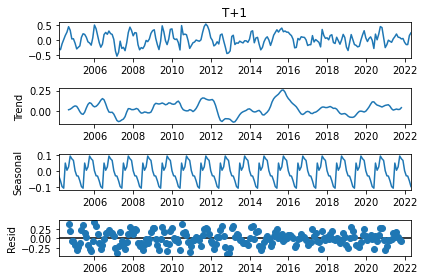

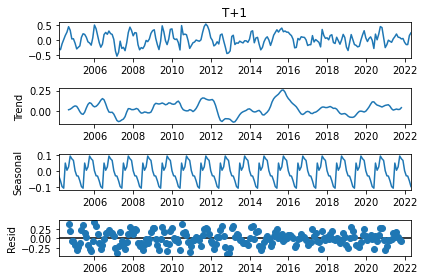

In [54]:
decompose_result = seasonal_decompose(errors_df['T+1'].dropna(), model="additive", period = 12)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
for col in master_df.columns[:-1]:
    df = master_df[[col, 'Observed_3MTH']]
    df.dropna(inplace = True)
    print(col + ' MAE: ' + str(mean_absolute_error(df['Observed_3MTH'], df[col])))

for col in master_df.columns[:-1]:
    df = master_df[[col, 'Observed_3MTH']]
    df.dropna(inplace = True)
    print(col + ' MSE: ' + str(mean_squared_error(df['Observed_3MTH'], df[col])))

C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:5: SettingWithCopyWarning:


A value is 

T+1 MAE: 0.18189408327287956
T+2 MAE: 0.24831722374774032
T+3 MAE: 0.3046764234665676
T+4 MAE: 0.36452844785054017
T+5 MAE: 0.42500502524424977
T+6 MAE: 0.473171166243047
T+7 MAE: 0.5107379922628135
T+8 MAE: 0.5471979654646231
T+9 MAE: 0.5714876452419774


C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:10: SettingWithCopyWarning:


A value

T+1 MSE: 0.050703255366573684
T+2 MSE: 0.09355950334045421
T+3 MSE: 0.1475549224347445
T+4 MSE: 0.21384695542866716
T+5 MSE: 0.2863347645898186
T+6 MSE: 0.3620354605619967
T+7 MSE: 0.4232994708588127
T+8 MSE: 0.4991273590731805
T+9 MSE: 0.5641073601669081


C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\raych\AppData\Local\Temp\ipykernel_20036\379528239.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Looking into Commodity Prices

In [56]:
cmdty_prices = pd.read_excel('cmdty_prices.xlsx')

In [57]:
cmdty_prices.head()

Unnamed: 0        Corn       Wheat     Soybean Soybean Oil  \
0                  NaN  C 1 Comdty  W 1 Comdty  S 1 Comdty  BO1 Comdty   
1                  NaN  Last Price  Last Price  Last Price  Last Price   
2                Dates     PX_LAST     PX_LAST     PX_LAST     PX_LAST   
3  2000-01-03 00:00:00      200.75       247.5       464.5        15.7   
4  2000-01-04 00:00:00         203      247.25       471.5       15.82   

  Soybean Meal      Cotton  
0   SM1 Comdty  CT2 Comdty  
1   Last Price  Last Price  
2      PX_LAST     PX_LAST  
3        146.7       52.36  
4        148.6       52.12

In [58]:
cmdty_prices = cmdty_prices.iloc[3:,:].set_index('Unnamed: 0')

In [59]:
cmdty_prices.index = pd.to_datetime(cmdty_prices.index)

In [60]:
cmdty_prices.index.name = 'Date'

In [61]:
cmdty_prices.plot()